In [3]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np
import random
import os
import pandas
from PIL import Image
import lib/labels

SyntaxError: invalid syntax (<ipython-input-3-d4cca9a47f9d>, line 10)

In [4]:
#image->business_id->label_ids->label names maps

#image_id->business_id
imgs_file = os.path.join(os.curdir,"../data/train_photo_to_biz_ids.csv")
a = np.loadtxt(imgs_file, dtype=np.dtype('string'), delimiter=",",skiprows=1)
img2biz = dict(a)

#business_id->list of label_ids
labels_file = os.path.join(os.curdir,"../data/train.csv")
l = np.loadtxt(labels_file, dtype=np.dtype('string'), delimiter=",",skiprows=1)
biz2labels = dict([(x[0],x[1].split()) for x in l])

#label_id->name
labels = {'0':'good_for_lunch','1':'good_for_dinner','2':'takes_reservations','3':'outdoor_seating','4':'restaurant_is_expensive','5':'has_alcohol','6':'has_table_service','7'
:'ambience_is_classy','8':'good_for_kids'}


In [2]:
img_bid_df = pandas.DataFrame.from_dict(img2biz, orient='index', dtype='string')
img_bid_df.columns = ['bid']
img_bid_df['img_width'] = np.zeros(len(img_bid_df))
img_bid_df['img_height'] = np.zeros(len(img_bid_df))
#img_bid_df['img_hist'] = [[]]

biz_labels_df = pandas.DataFrame.from_dict(biz2labels, orient='index', dtype='bool')
biz_labels_df.columns = labels.values()
biz_labels_df

NameError: name 'pandas' is not defined

In [78]:
limit = 234843
base_dir = "../data/train_photos/"



for i, bid in img_bid_df.iterrows():
    if limit < 0:
        break
    limit -= 1
    img = Image.open(base_dir + i + ".jpg")
    height, width = img.size
    img_bid_df.set_value(i, 'img_width', width)
    img_bid_df.set_value(i, 'img_height', height)
    #img_bid_df.set_value(i, 'img_hist', img.histogram())

img_bid_df

,bid,img_width,img_height
378466,227,375,500
287144,1136,311,500
378465,108,375,500
228051,2058,375,500
228050,297,500,375
287142,2611,375,500
287143,2339,447,500
378468,271,500,375
370255,2411,500,375
89371,3595,375,500


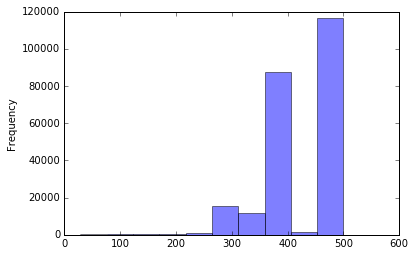

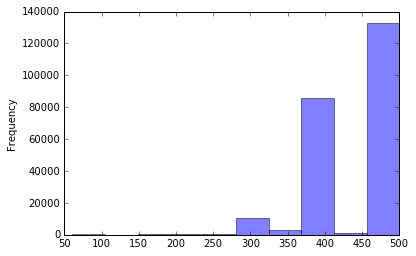

In [85]:
plt.figure(); img_bid_df['img_width'].plot(kind='hist', alpha=0.5)
plt.figure(); img_bid_df['img_height'].plot(kind='hist', alpha=0.5)